## Лабораторная работа №2
    ФИО: Михайлов Александр Евгеньевич
    Группа: БИВТ-23-СП-1

## 0. Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('student-mat.csv', sep=',')

In [ ]:
data.head() # Показываем первые 5 строк таблицы данных

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2. Описание постановки задачи

**Цель:** Анализ влияния потребления алкоголя и социальных факторов на успеваемость студентов.

**Целевая переменная:** `G3` (итоговая оценка) - **дискретная** (0-20 баллов)

| Переменная | Определение | Ключ / Значения |
|------------|-------------|-----------------|
| **G3** | Итоговая оценка | 0-20 (непрерывная) |
| **Dalc** | Алкоголь в рабочие дни | 1-5 (очень низкое - очень высокое) |
| **Walc** | Алкоголь в выходные | 1-5 (очень низкое - очень высокое) |
| **sex** | Пол | M - мужской, F - женский |
| **age** | Возраст | 15-22 года |
| **studytime** | Время на учебу | 1-4 (<2ч - >10ч) |
| **goout** | Прогулки с друзьями | 1-5 (редко - часто) |
| **absences** | Пропуски занятий | 0-93 |
| **failures** | Неудачи в учебе | 0-4 |
| **higher** | Планы на ВО | yes/no |
| **health** | Состояние здоровья | 1-5 (плохое - отличное) |

In [ ]:
print(data.shape)      # размерность (строки, столбцы)
print()
print(data.dtypes)     # типы столбцов
data.sample(5, random_state=42) # случайная выборка

(395, 33)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9


### 3. Распределение целевой переменной

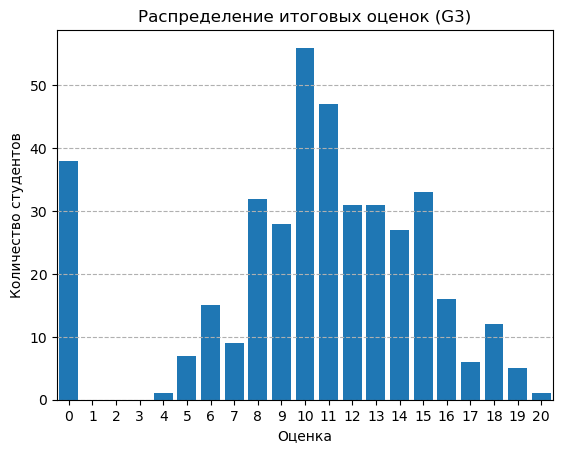

Всего студентов: 395
Уникальных оценок: 18


In [ ]:
# Подсчитываем сколько студентов получили каждую оценку
g3_counts = data['G3'].value_counts()

plt.bar(g3_counts.index, g3_counts.values)
plt.title('Распределение итоговых оценок (G3)')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.grid(axis='y', linestyle='--')
plt.xticks(range(0, 21, 1))
plt.xlim(-0.5, 20.5)
plt.show()

print("Всего студентов:", len(data))
print("Уникальных оценок:", data['G3'].nunique())

* ### Неоднородность распределения:
Распределение неоднородное — видно несколько выраженных пиков.<br>
Есть высокий столбец при оценке 0–1, что указывает на студентов, не сдавших экзамен.
* ### Дисбаланс:

Явный дисбаланс между низкими и средними оценками:<br>
Много студентов с низкими (0–1) и средними (10–12) баллами. Гораздо меньше — с очень высокими (17–20).<br>
Распределение смещёно — пик в районе 10–12, с постепенным спадом вправо. 

## 4. Основные статистики по переменным

In [ ]:
data.describe() # Показывает основные статистики для всех числовых столбцов

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 5. Вывод основной информации о датасете

In [ ]:
data.info() # Показывает основную информацию о структуре данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 6. Количество пропусков элементов во всех колонках

In [ ]:
data.isna().sum() # Подсчитывает количество пропущенных значений (NaN) в каждом столбце

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Анализ пропусков:
Пропусков не обнаружено<br>
Все 395 студентов имеют полные данные по всем 33 переменным<br>
Датасет готов к дальнейшему анализу без дополнительной обработки<br>

## 6. Гистограммы распределения:
- возраста
- планов получения высшего образования
- потребления алкоголя в выходные
- свободного времени
- текущего состояние здоровья

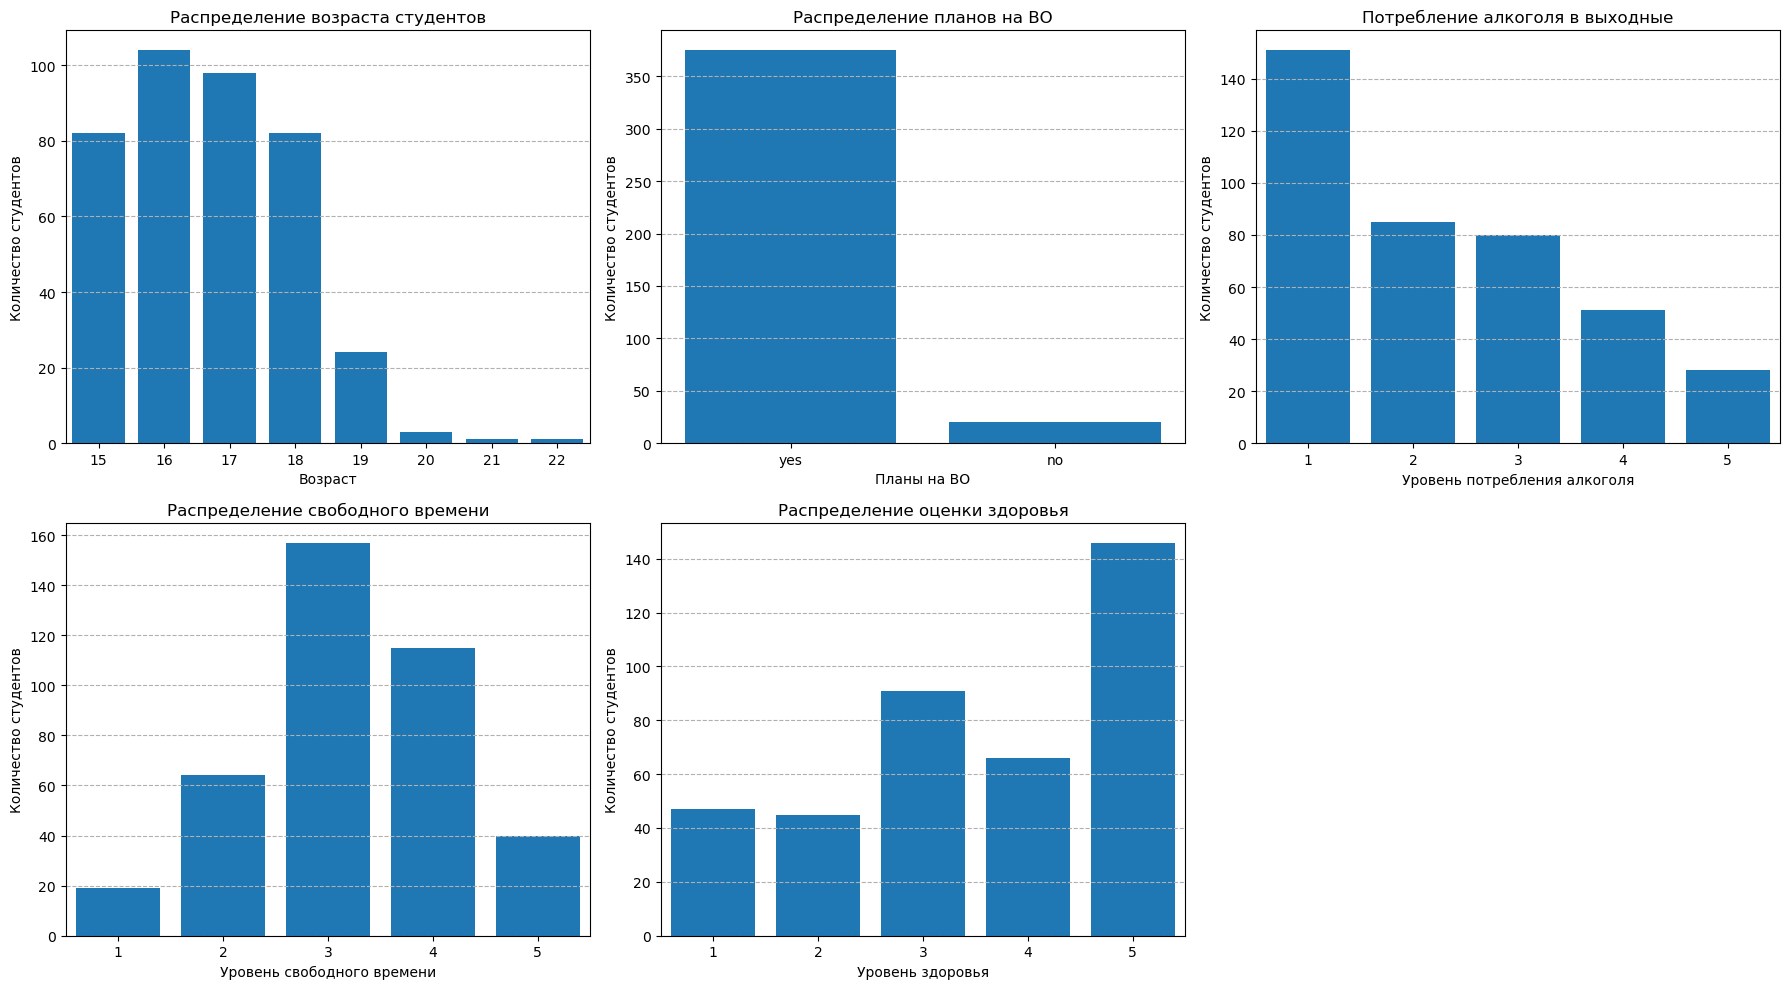

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Распределение возраста (age)
age_counts = data['age'].value_counts()
axs[0,0].bar(age_counts.index, age_counts.values)
axs[0,0].set_title('Распределение возраста студентов')
axs[0,0].set_xlabel('Возраст')
axs[0,0].set_ylabel('Количество студентов')
axs[0,0].grid(axis='y', linestyle='--')
axs[0,0].set_xticks(range(15, 23, 1))
axs[0,0].set_xlim(14.5, 22.5)

# Распределение планов на высшее образование (higher)
higher_counts = data['higher'].value_counts()
axs[0,1].bar(higher_counts.index, higher_counts.values)
axs[0,1].set_title('Распределение планов на ВО')
axs[0,1].set_xlabel('Планы на ВО')
axs[0,1].set_ylabel('Количество студентов')
axs[0,1].grid(axis='y', linestyle='--')

# Распределение потребления алкоголя в выходные (Walc)
walc_counts = data['Walc'].value_counts()
axs[0,2].bar(walc_counts.index, walc_counts.values)
axs[0,2].set_title('Потребление алкоголя в выходные')
axs[0,2].set_xlabel('Уровень потребления алкоголя')
axs[0,2].set_ylabel('Количество студентов')
axs[0,2].grid(axis='y', linestyle='--')
axs[0,2].set_xticks(range(1, 6, 1))
axs[0,2].set_xlim(0.5, 5.5)

# Распределение свободного времени (freetime)
freetime_counts = data['freetime'].value_counts()
axs[1,0].bar(freetime_counts.index, freetime_counts.values)
axs[1,0].set_title('Распределение свободного времени')
axs[1,0].set_xlabel('Уровень свободного времени')
axs[1,0].set_ylabel('Количество студентов')
axs[1,0].grid(axis='y', linestyle='--')
axs[1,0].set_xticks(range(1, 6, 1))
axs[1,0].set_xlim(0.5, 5.5)

# Распределение здоровья (health)
health_counts = data['health'].value_counts()
axs[1,1].bar(health_counts.index, health_counts.values)
axs[1,1].set_title('Распределение оценки здоровья')
axs[1,1].set_xlabel('Уровень здоровья')
axs[1,1].set_ylabel('Количество студентов')
axs[1,1].grid(axis='y', linestyle='--')
axs[1,1].set_xticks(range(1, 6, 1))
axs[1,1].set_xlim(0.5, 5.5)

axs[1,2].set_visible(False)

plt.tight_layout()
plt.show()

### Анализ гистограмм:
#### 1. Возраст студентов
Распределение несимметрично, смещением влево (в сторону младшего возраста).<br>
Основная масса студентов — 15–17 лет, после 18 количество резко уменьшается.
#### 2. Планы на высшее образование
Распределение несбалансировано.<br>
Почти все студенты планируют получать высшее образование ("yes" сильно преобладает над "no").
#### 3. Потребление алкоголя в выходные
Распределение смещено влево — большинство студентов имеют низкий уровень потребления (1–2).
#### 4. Свободное время
Распределение смещено вправо — большинство студентов оценивают своё свободное время как среднее или выше среднего (3–4).<br>
Можно говорить о умеренно правостороннем распределении и относительной однородности в центральной части.
#### 5. Оценка здоровья
Распределение несимметрично, с пиком в районе 3 (средний уровень здоровья).<br>Высокие оценки (4–5) встречаются чаще, чем низкие (1–2), что говорит о преобладании положительной самооценки здоровья.


## 8. Графики зависимости переменных от целевой переменной G3


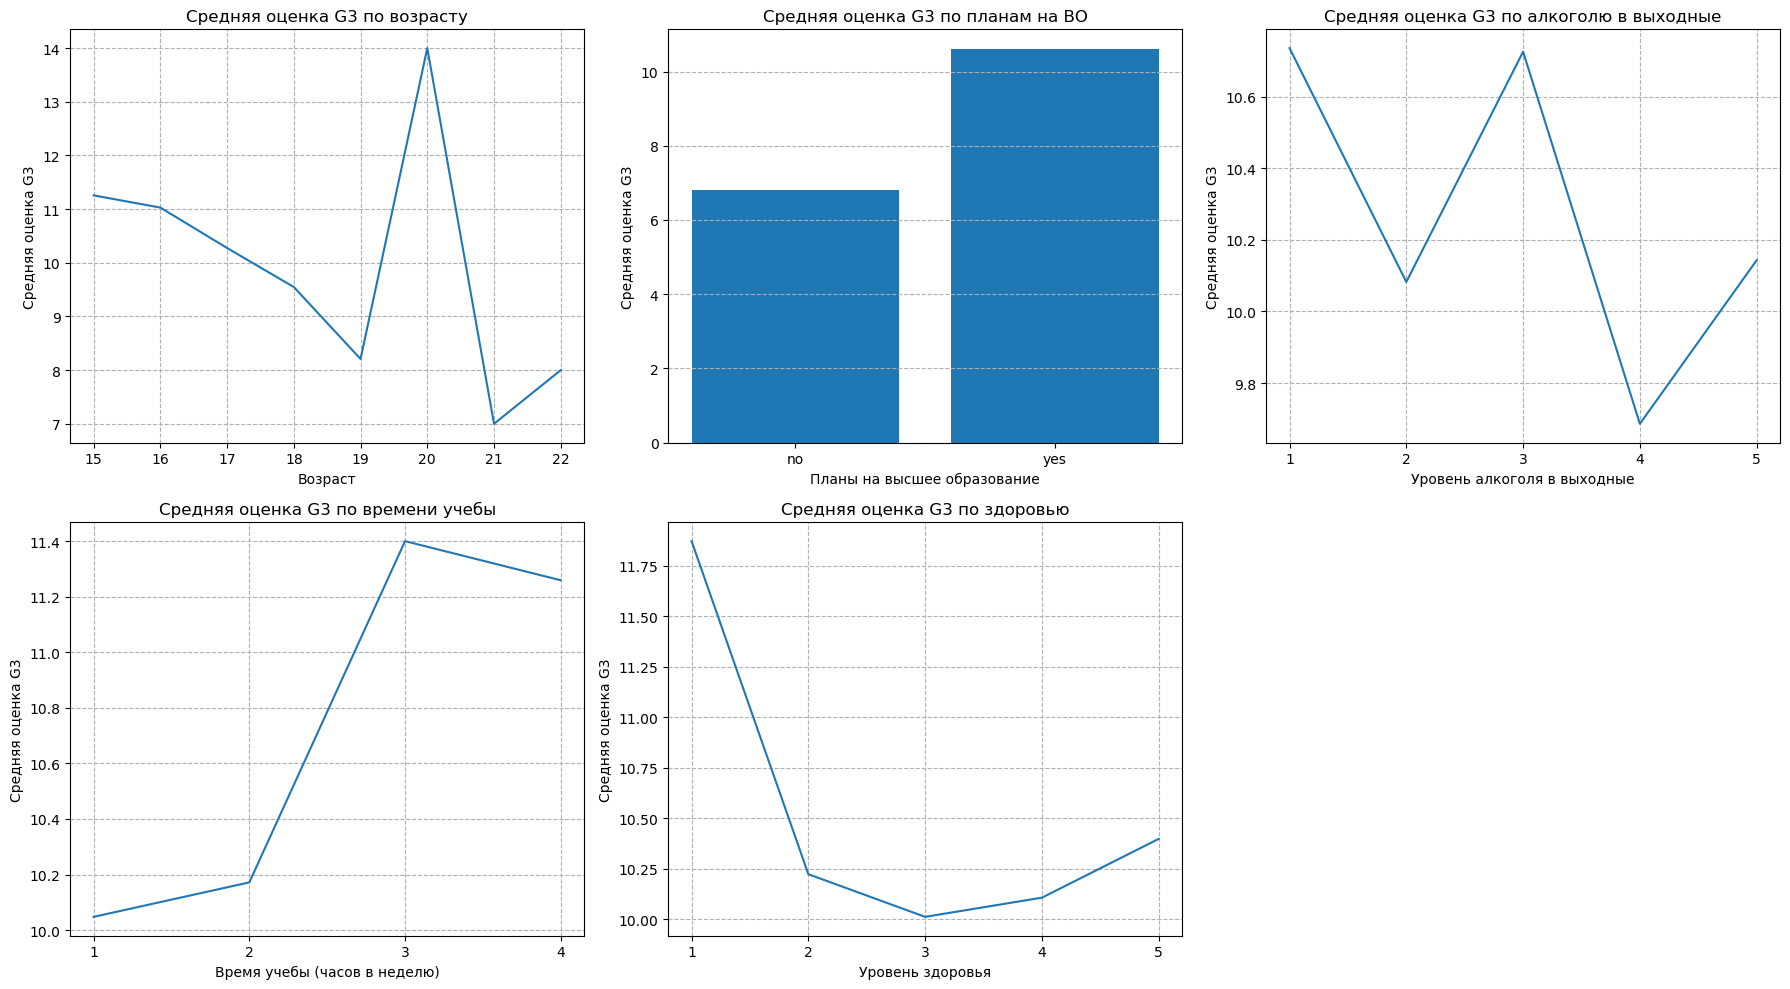

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# 1. Зависимость оценок от возраста
age_means = data.groupby('age')['G3'].mean()
axs[0,0].plot(age_means.index, age_means.values)
axs[0,0].set_title('Средняя оценка G3 по возрасту')
axs[0,0].set_xlabel('Возраст')
axs[0,0].set_ylabel('Средняя оценка G3')
axs[0,0].grid(True, linestyle='--')
axs[0,0].set_xticks(range(15, 23))

# 2. Зависимость оценок от планов на ВО
higher_means = data.groupby('higher')['G3'].mean()
axs[0,1].bar(higher_means.index, higher_means.values)
axs[0,1].set_title('Средняя оценка G3 по планам на ВО')
axs[0,1].set_xlabel('Планы на высшее образование')
axs[0,1].set_ylabel('Средняя оценка G3')
axs[0,1].grid(axis='y', linestyle='--')

# 3. Зависимость оценок от алкоголя в выходные
walc_means = data.groupby('Walc')['G3'].mean()
axs[0,2].plot(walc_means.index, walc_means.values)
axs[0,2].set_title('Средняя оценка G3 по алкоголю в выходные')
axs[0,2].set_xlabel('Уровень алкоголя в выходные')
axs[0,2].set_ylabel('Средняя оценка G3')
axs[0,2].grid(True, linestyle='--')
axs[0,2].set_xticks(range(1, 6))

# 4. Зависимость оценок от времени учебы
studytime_means = data.groupby('studytime')['G3'].mean()
axs[1,0].plot(studytime_means.index, studytime_means.values)
axs[1,0].set_title('Средняя оценка G3 по времени учебы')
axs[1,0].set_xlabel('Время учебы (часов в неделю)')
axs[1,0].set_ylabel('Средняя оценка G3')
axs[1,0].grid(True, linestyle='--')
axs[1,0].set_xticks(range(1, 5))

# 5. Зависимость оценок от здоровья (вместо пропусков)
health_means = data.groupby('health')['G3'].mean()
axs[1,1].plot(health_means.index, health_means.values)
axs[1,1].set_title('Средняя оценка G3 по здоровью')
axs[1,1].set_xlabel('Уровень здоровья')
axs[1,1].set_ylabel('Средняя оценка G3')
axs[1,1].grid(True, linestyle='--')
axs[1,1].set_xticks(range(1, 6))

axs[1,2].set_visible(False)

plt.tight_layout()
plt.show()

### Вывод о использовании переменных для прогнозирования целевой переменной
- Время учебы: Здесь наблюдается четкая положительная корреляция. Чем больше времени студент тратит на учебу (от категории 1 к 4), тем выше его средняя оценка.
- Планы на ВО: Студенты, планирующие получать высшее образование ("yes"), в среднем имеют значительно более высокие оценки, чем те, кто не планирует ("no").
- Алкоголь в выходные: Взаимосвязь существует, но она нелинейная. Нельзя сказать "чем больше алкоголя, тем ниже оценка". У групп 1 и 3 оценки выше, чем у группы 2, а у группы 4 — самая низкая.
### Вывод:
Переменные "Время учебы" и "Планы на ВО" подходят для прогнозирования целевой переменной, так как показывают ясную корреляцию с итоговой оценкой.

## 9. Две кривые в разрезе целевой переменной

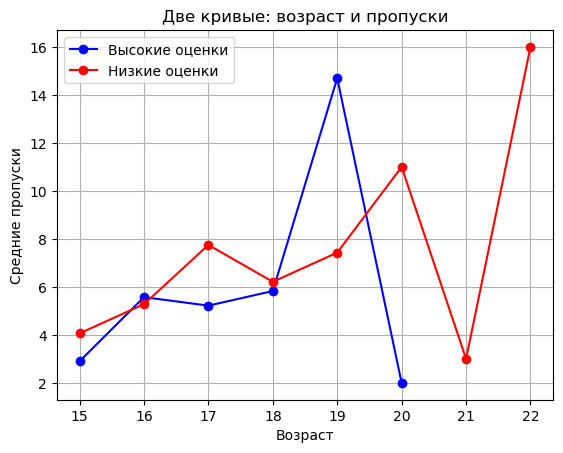

In [ ]:
# Создаем группы по оценкам
data['grade_group'] = ['high' if grade >= 11 else 'low' for grade in data['G3']]

# Группируем по возрасту и считаем средние пропуски для каждой группы
high_means = data[data['grade_group'] == 'high'].groupby('age')['absences'].mean()
low_means = data[data['grade_group'] == 'low'].groupby('age')['absences'].mean()

# Строим две кривые
plt.plot(high_means.index, high_means.values, marker='o', color='blue', label='Высокие оценки')
plt.plot(low_means.index, low_means.values, marker='o', color='red', label='Низкие оценки')

plt.xlabel('Возраст')
plt.ylabel('Средние пропуски')
plt.title('Две кривые: возраст и пропуски')
plt.legend()
plt.grid(True)
plt.show()